In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [48]:
df=pd.read_csv(r'C:\Users\dewat\OneDrive\Documents\Python for data analysis\SkillCraft1_Dataset.csv')
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019



Attribute Information:

1. GameID: Unique ID number for each game (integer)
2. LeagueIndex: Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues coded 1-8 (Ordinal)
3. Age: Age of each player (integer)
4. HoursPerWeek: Reported hours spent playing per week (integer)
5. TotalHours: Reported total hours spent playing (integer)
6. APM: Action per minute (continuous)
7. SelectByHotkeys: Number of unit or building selections made using hotkeys per timestamp (continuous)
8. AssignToHotkeys: Number of units or buildings assigned to hotkeys per timestamp (continuous)
9. UniqueHotkeys: Number of unique hotkeys used per timestamp (continuous)
10. MinimapAttacks: Number of attack actions on minimap per timestamp (continuous)
11. MinimapRightClicks: number of right-clicks on minimap per timestamp (continuous)
12. NumberOfPACs: Number of PACs per timestamp (continuous)
13. GapBetweenPACs: Mean duration in milliseconds between PACs (continuous)
14. ActionLatency: Mean latency from the onset of a PACs to their first action in milliseconds (continuous)
15. ActionsInPAC: Mean number of actions within each PAC (continuous)
16. TotalMapExplored: The number of 24x24 game coordinate grids viewed by the player per timestamp (continuous)
17. WorkersMade: Number of SCVs, drones, and probes trained per timestamp (continuous)
18. UniqueUnitsMade: Unique unites made per timestamp (continuous)
19. ComplexUnitsMade: Number of ghosts, infestors, and high templars trained per timestamp (continuous)
20. ComplexAbilitiesUsed: Abilities requiring specific targeting instructions used per timestamp (continuous)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

In [3]:
df["Age"].unique()

array(['27', '23', '30', '19', '32', '21', '17', '20', '18', '16', '26',
       '38', '28', '25', '22', '29', '24', '35', '31', '33', '37', '40',
       '34', '43', '41', '36', '44', '39', '?'], dtype=object)

<AxesSubplot:xlabel='Age', ylabel='count'>

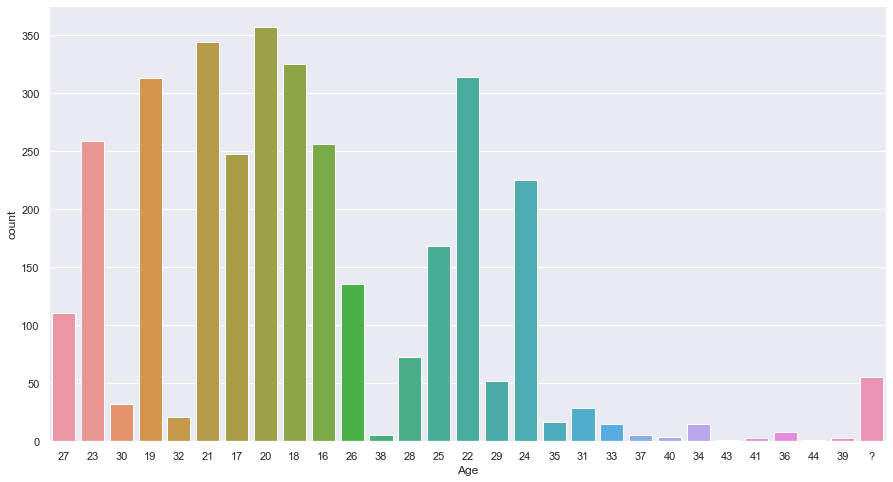

In [4]:
plt.figure(figsize=(15,8))
sns.countplot(x='Age',data=df)

We see that '?' are exeptions and are not too much, so we can replace them by the median

In [5]:
med=df["Age"][df["Age"]!='?'].median()
df["Age"]=df["Age"].replace("?",med)
df["Age"].unique()

array(['27', '23', '30', '19', '32', '21', '17', '20', '18', '16', '26',
       '38', '28', '25', '22', '29', '24', '35', '31', '33', '37', '40',
       '34', '43', '41', '36', '44', '39', 21.0], dtype=object)

In [6]:
df["Age"]=df["Age"].astype('int')
df["Age"].unique()

array([27, 23, 30, 19, 32, 21, 17, 20, 18, 16, 26, 38, 28, 25, 22, 29, 24,
       35, 31, 33, 37, 40, 34, 43, 41, 36, 44, 39])

In [7]:
df["HoursPerWeek"].unique()


array(['10', '20', '6', '8', '42', '14', '24', '16', '4', '12', '30',
       '28', '70', '2', '56', '36', '40', '18', '96', '50', '168', '48',
       '84', '0', '72', '112', '90', '32', '98', '140', '?', '80', '60'],
      dtype=object)

<AxesSubplot:xlabel='HoursPerWeek', ylabel='count'>

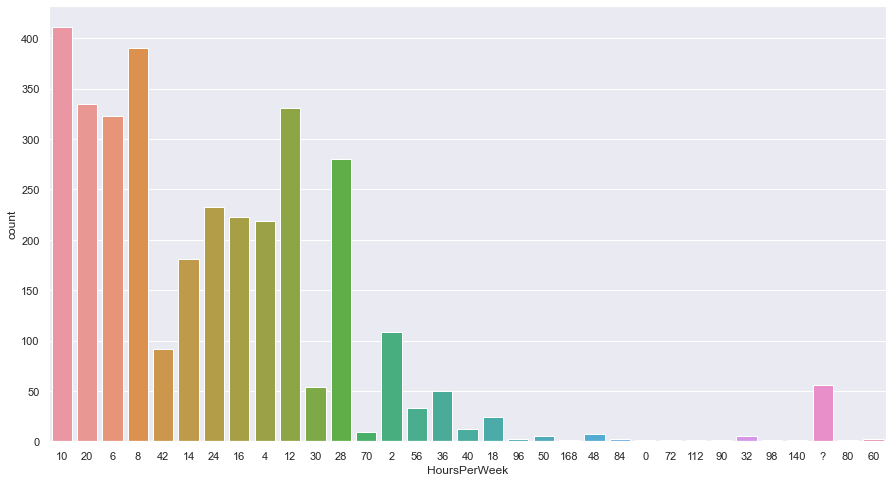

In [8]:
plt.figure(figsize=(15,8))
sns.countplot(x='HoursPerWeek',data=df)

In [56]:
df[df["HoursPerWeek"]=="?"].head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
1841,5255,5,18,?,?,122.2470,0.006357,0.000433,3,0.000014,0.000257,0.003043,30.8929,62.2933,5.3822,23,0.001055,5,0.000000,0.000338
3340,10001,8,?,?,?,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.000000
3341,10005,8,?,?,?,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.000000
3342,10006,8,?,?,?,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.000000
3343,10015,8,?,?,?,274.2552,0.018121,0.001264,8,0.000053,0.000975,0.007111,10.6419,24.3556,4.3870,28,0.001106,6,0.000000,0.000000


We see that "?" from Age,HoursPerWeeK and TotalHours are all on same rows in most of cases

In [54]:
df[df["LeagueIndex"]==8].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 3340 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                55 non-null     int64  
 1   LeagueIndex           55 non-null     int64  
 2   Age                   55 non-null     object 
 3   HoursPerWeek          55 non-null     object 
 4   TotalHours            55 non-null     object 
 5   APM                   55 non-null     float64
 6   SelectByHotkeys       55 non-null     float64
 7   AssignToHotkeys       55 non-null     float64
 8   UniqueHotkeys         55 non-null     int64  
 9   MinimapAttacks        55 non-null     float64
 10  MinimapRightClicks    55 non-null     float64
 11  NumberOfPACs          55 non-null     float64
 12  GapBetweenPACs        55 non-null     float64
 13  ActionLatency         55 non-null     float64
 14  ActionsInPAC          55 non-null     float64
 15  TotalMapExplored    

We see that '?' are exeptions and are not too much, so we can replace them by the median

In [9]:
med=df["HoursPerWeek"][df["HoursPerWeek"]!='?'].median()
df["HoursPerWeek"]=df["HoursPerWeek"].replace("?",med)
df["HoursPerWeek"].unique()

array(['10', '20', '6', '8', '42', '14', '24', '16', '4', '12', '30',
       '28', '70', '2', '56', '36', '40', '18', '96', '50', '168', '48',
       '84', '0', '72', '112', '90', '32', '98', '140', 12.0, '80', '60'],
      dtype=object)

In [10]:
df["HoursPerWeek"]=df["HoursPerWeek"].astype('int')
df["HoursPerWeek"].unique()

array([ 10,  20,   6,   8,  42,  14,  24,  16,   4,  12,  30,  28,  70,
         2,  56,  36,  40,  18,  96,  50, 168,  48,  84,   0,  72, 112,
        90,  32,  98, 140,  80,  60])

In [11]:
df["TotalHours"].unique()

array(['3000', '5000', '200', '400', '500', '70', '240', '10000', '2708',
       '800', '6000', '190', '350', '1000', '1500', '2000', '120', '1100',
       '2520', '700', '160', '150', '250', '730', '230', '300', '100',
       '270', '1200', '30', '600', '540', '280', '1600', '50', '140',
       '900', '550', '625', '1300', '450', '750', '612', '180', '770',
       '720', '415', '1800', '2200', '480', '430', '639', '360', '1250',
       '365', '650', '233', '416', '1825', '780', '1260', '315', '10',
       '312', '110', '1700', '92', '2500', '1400', '220', '999', '303',
       '96', '184', '4000', '420', '60', '2400', '2160', '80', '25',
       '624', '176', '?', '35', '1163', '333', '75', '7', '40', '325',
       '90', '175', '88', '850', '26', '1650', '465', '235', '1350',
       '460', '848', '256', '130', '1466', '670', '711', '1030', '1080',
       '1460', '1050', '20000', '582', '2800', '553', '1008', '330',
       '936', '243', '1320', '425', '1145', '366', '2700', '830', '3',
 

We see that '?' are exeptions and are not too much, so we can replace them by the median

In [12]:
med=df["TotalHours"][df["TotalHours"]!='?'].median()
df["TotalHours"]=df["TotalHours"].replace("?",med)
df["TotalHours"].unique()

array(['3000', '5000', '200', '400', '500', '70', '240', '10000', '2708',
       '800', '6000', '190', '350', '1000', '1500', '2000', '120', '1100',
       '2520', '700', '160', '150', '250', '730', '230', '300', '100',
       '270', '1200', '30', '600', '540', '280', '1600', '50', '140',
       '900', '550', '625', '1300', '450', '750', '612', '180', '770',
       '720', '415', '1800', '2200', '480', '430', '639', '360', '1250',
       '365', '650', '233', '416', '1825', '780', '1260', '315', '10',
       '312', '110', '1700', '92', '2500', '1400', '220', '999', '303',
       '96', '184', '4000', '420', '60', '2400', '2160', '80', '25',
       '624', '176', 500.0, '35', '1163', '333', '75', '7', '40', '325',
       '90', '175', '88', '850', '26', '1650', '465', '235', '1350',
       '460', '848', '256', '130', '1466', '670', '711', '1030', '1080',
       '1460', '1050', '20000', '582', '2800', '553', '1008', '330',
       '936', '243', '1320', '425', '1145', '366', '2700', '830', '3',

In [13]:
df["TotalHours"]=df["TotalHours"].astype('int')
df["TotalHours"].unique()

array([   3000,    5000,     200,     400,     500,      70,     240,
         10000,    2708,     800,    6000,     190,     350,    1000,
          1500,    2000,     120,    1100,    2520,     700,     160,
           150,     250,     730,     230,     300,     100,     270,
          1200,      30,     600,     540,     280,    1600,      50,
           140,     900,     550,     625,    1300,     450,     750,
           612,     180,     770,     720,     415,    1800,    2200,
           480,     430,     639,     360,    1250,     365,     650,
           233,     416,    1825,     780,    1260,     315,      10,
           312,     110,    1700,      92,    2500,    1400,     220,
           999,     303,      96,     184,    4000,     420,      60,
          2400,    2160,      80,      25,     624,     176,      35,
          1163,     333,      75,       7,      40,     325,      90,
           175,      88,     850,      26,    1650,     465,     235,
          1350,     

In [14]:
df[df["TotalHours"]>=1000000]

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
1793,5140,5,18,24,1000000,281.4246,0.023428,0.000799,5,0.000041,0.000447,0.005136,28.1164,36.1266,5.8522,29,0.001328,6,0.0,0.0


We can see that one row has a huge number of total hours, it's better to delete it.

In [15]:
ind = df[ df['TotalHours'] >= 1000000].index
df.drop(ind , inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3394 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3394 non-null   int64  
 1   LeagueIndex           3394 non-null   int64  
 2   Age                   3394 non-null   int32  
 3   HoursPerWeek          3394 non-null   int32  
 4   TotalHours            3394 non-null   int32  
 5   APM                   3394 non-null   float64
 6   SelectByHotkeys       3394 non-null   float64
 7   AssignToHotkeys       3394 non-null   float64
 8   UniqueHotkeys         3394 non-null   int64  
 9   MinimapAttacks        3394 non-null   float64
 10  MinimapRightClicks    3394 non-null   float64
 11  NumberOfPACs          3394 non-null   float64
 12  GapBetweenPACs        3394 non-null   float64
 13  ActionLatency         3394 non-null   float64
 14  ActionsInPAC          3394 non-null   float64
 15  TotalMapExplored     

In [17]:
df.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.00000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000
mean,4804.913671,4.183854,21.638480,15.843842,658.334708,116.998515,0.004293,0.000373,4.364467,0.000098,0.000387,0.003462,40.36517,63.747538,5.272818,22.129641,0.001032,6.534178,0.000059,0.000142
std,2720.339558,1.517486,4.173069,11.875189,849.377506,51.876225,0.005275,0.000225,2.360656,0.000166,0.000377,0.000992,17.15481,19.235862,1.495023,7.431879,0.000519,1.857948,0.000111,0.000265
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.66670,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.250000,3.000000,19.000000,8.000000,300.000000,79.863600,0.001258,0.000204,3.000000,0.000000,0.000140,0.002753,28.96595,50.454375,4.272575,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4871.000000,4.000000,21.000000,12.000000,500.000000,108.006300,0.002498,0.000353,4.000000,0.000040,0.000281,0.003395,36.72745,60.935350,5.094950,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7109.250000,5.000000,24.000000,20.000000,800.000000,142.783650,0.005128,0.000499,6.000000,0.000119,0.000514,0.004026,48.29055,73.689800,6.033750,27.000000,0.001258,8.000000,0.000086,0.000182
max,10095.000000,8.000000,44.000000,168.000000,25000.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.14290,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [18]:
df.isnull().sum()

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

<AxesSubplot:xlabel='LeagueIndex', ylabel='count'>

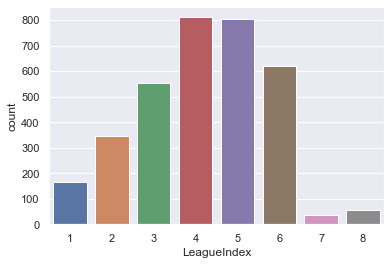

In [20]:
sns.countplot(x='LeagueIndex',data=df)

In [19]:
correlation=df.corr()
x=correlation.iloc[1].abs().sort_values(ascending=False)
x

LeagueIndex             1.000000
ActionLatency           0.673945
APM                     0.662814
NumberOfPACs            0.612208
GapBetweenPACs          0.553198
AssignToHotkeys         0.531128
SelectByHotkeys         0.490995
UniqueHotkeys           0.351190
MinimapAttacks          0.312618
WorkersMade             0.295579
TotalHours              0.248342
MinimapRightClicks      0.233217
TotalMapExplored        0.220567
HoursPerWeek            0.192555
ComplexUnitsMade        0.148932
ComplexAbilitiesUsed    0.145830
ActionsInPAC            0.143069
UniqueUnitsMade         0.133560
Age                     0.127169
GameID                  0.102586
Name: LeagueIndex, dtype: float64

We can see the most correlated variables with 'LeagueIndex'

<AxesSubplot:xlabel='LeagueIndex', ylabel='ActionLatency'>

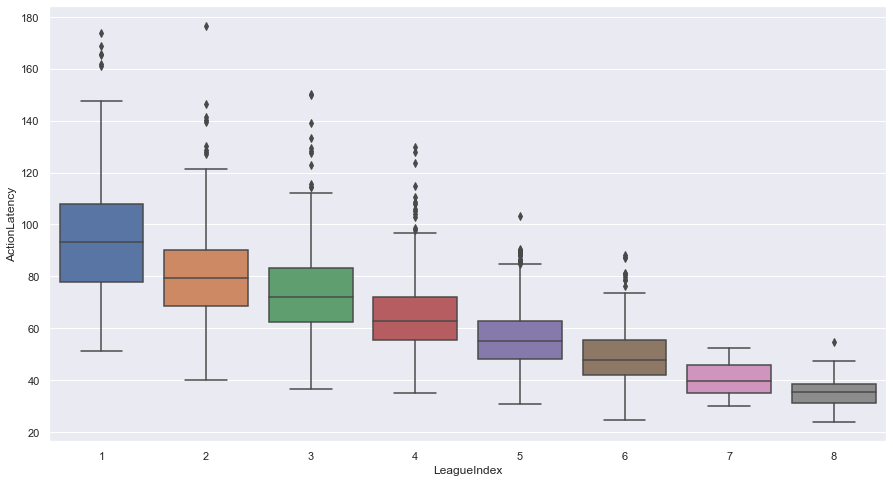

In [20]:
plt.figure(figsize=(15,8))
sns.boxplot(x="LeagueIndex",y="ActionLatency",data=df)

<AxesSubplot:xlabel='LeagueIndex', ylabel='APM'>

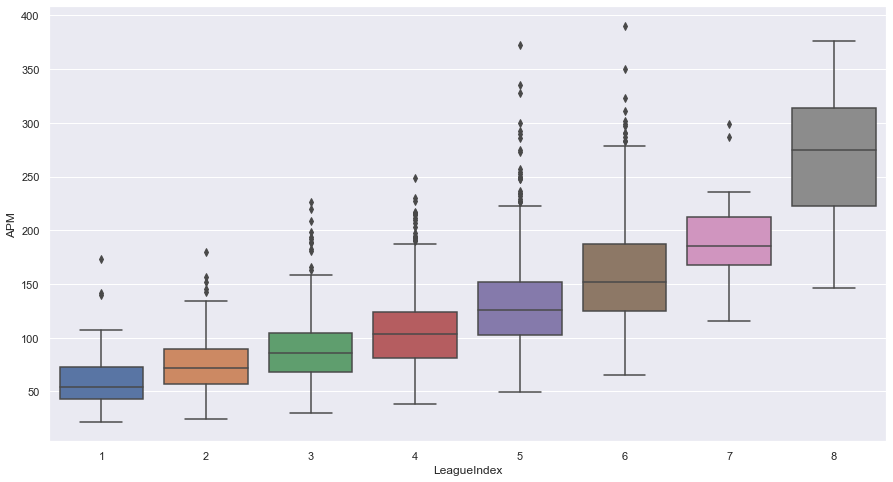

In [21]:
plt.figure(figsize=(15,8))
sns.boxplot(x="LeagueIndex",y="APM",data=df)

<AxesSubplot:xlabel='LeagueIndex', ylabel='NumberOfPACs'>

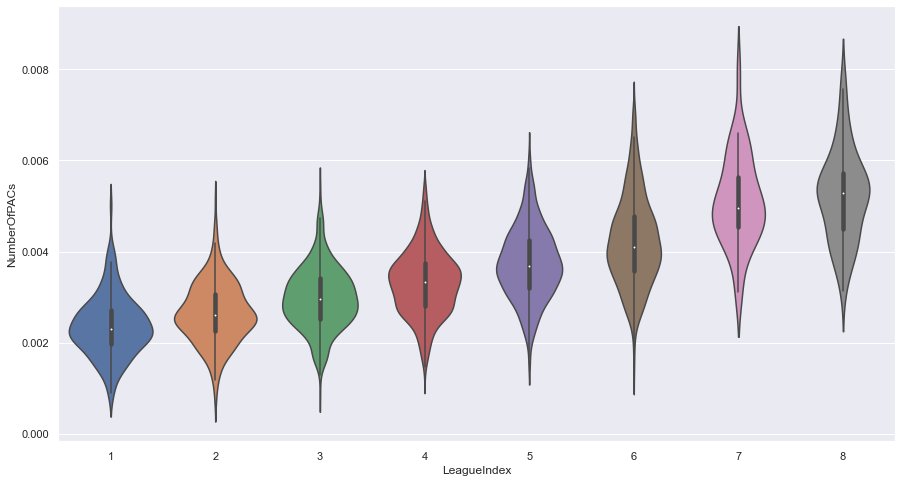

In [22]:
plt.figure(figsize=(15,8))
sns.violinplot(x="LeagueIndex",y="NumberOfPACs",data=df)

<AxesSubplot:xlabel='LeagueIndex', ylabel='AssignToHotkeys'>

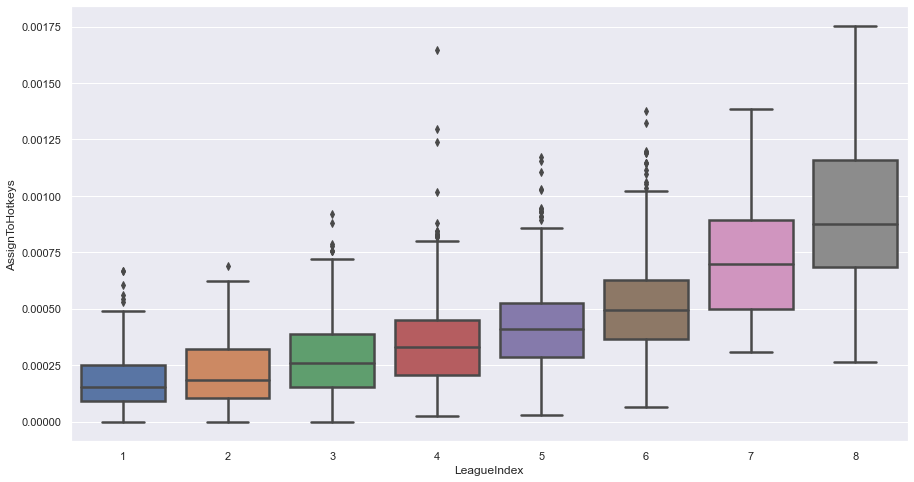

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(x="LeagueIndex",y="AssignToHotkeys",data=df,linewidth=2.5)

<AxesSubplot:xlabel='LeagueIndex', ylabel='SelectByHotkeys'>

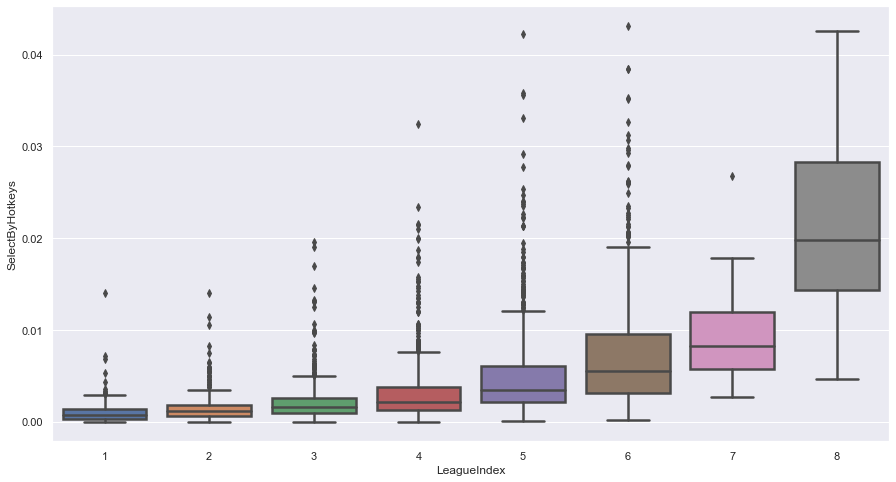

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(x="LeagueIndex",y="SelectByHotkeys",data=df,linewidth=2.5)

<AxesSubplot:xlabel='LeagueIndex', ylabel='UniqueHotkeys'>

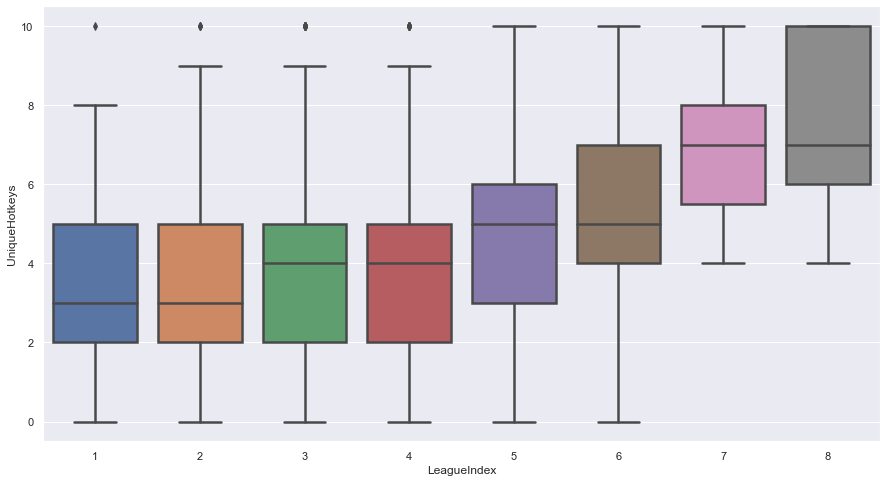

In [97]:
plt.figure(figsize=(15,8))
sns.boxplot(x="LeagueIndex",y="UniqueHotkeys",data=df,linewidth=2.5)

<AxesSubplot:xlabel='LeagueIndex', ylabel='Age'>

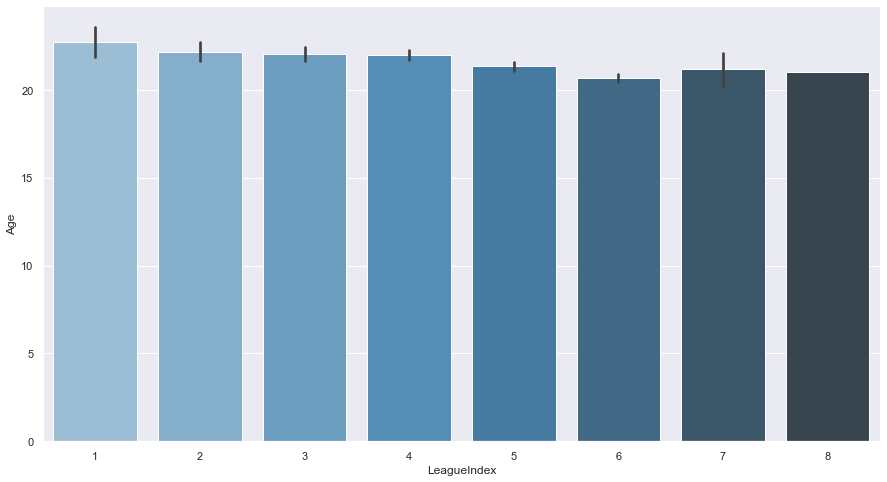

In [25]:
plt.figure(figsize=(15,8))
from numpy import mean
sns.barplot(x='LeagueIndex',y='Age',estimator=mean,data=df, palette="Blues_d")

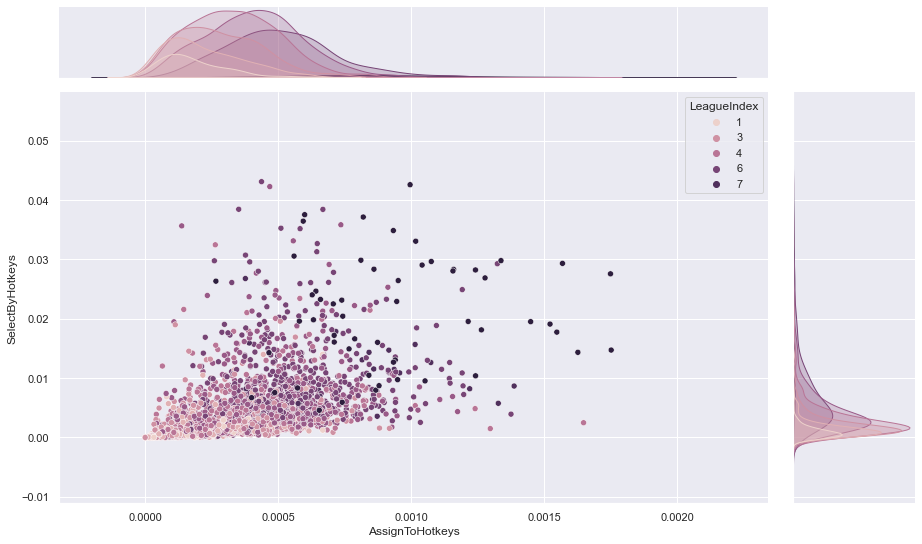

In [26]:
sns.jointplot(x='AssignToHotkeys',
              y="SelectByHotkeys",
              hue='LeagueIndex',
              #kind="kde",
              data=df).fig.set_size_inches(14,8)

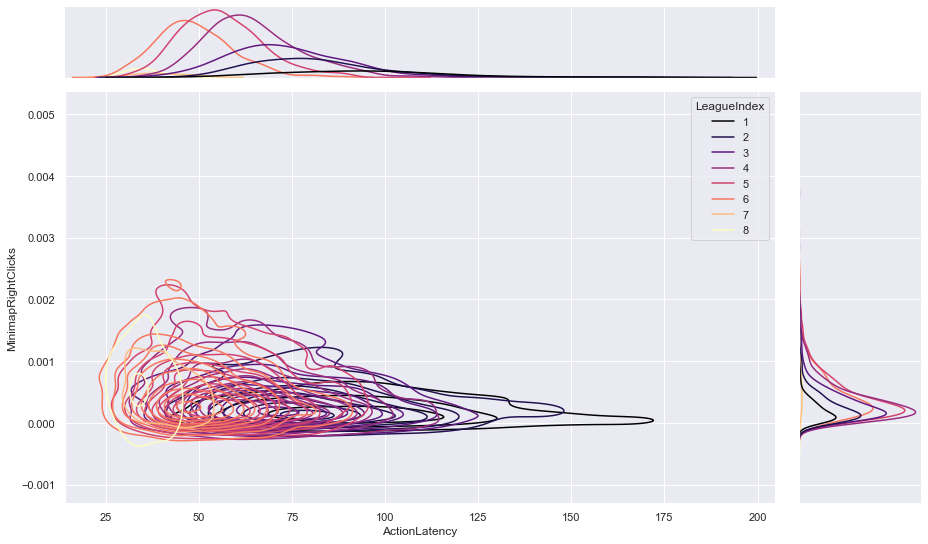

In [27]:
sns.jointplot(x='ActionLatency',
              y="MinimapRightClicks",
              hue='LeagueIndex',
              kind="kde",
              palette="magma",
              data=df).fig.set_size_inches(14,8)

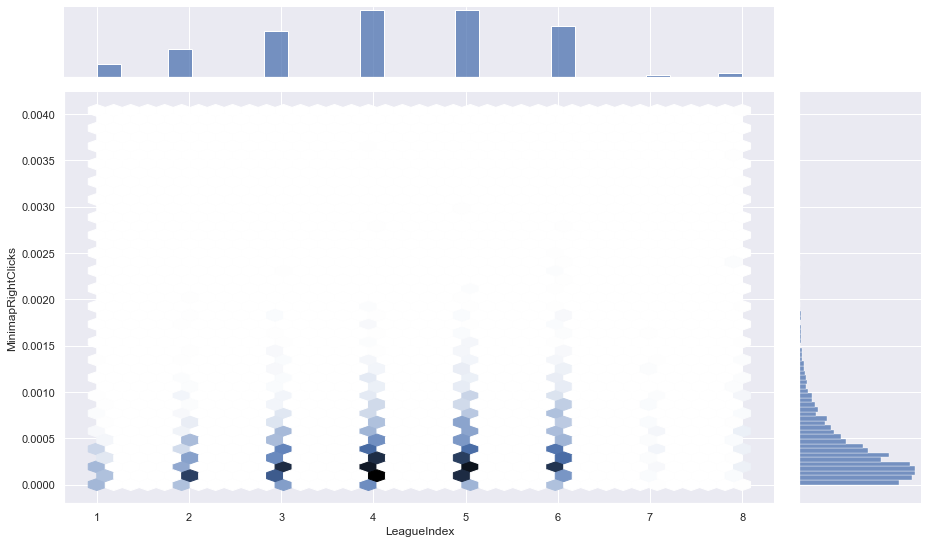

In [28]:
sns.jointplot(x='LeagueIndex',
              y="MinimapRightClicks",
              kind="hex",
              data=df).fig.set_size_inches(14,8)

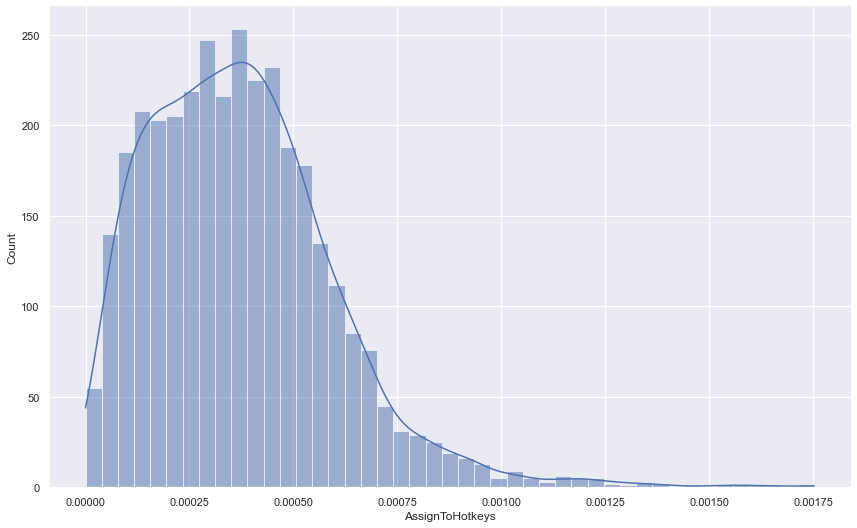

In [30]:
sns.displot(df["AssignToHotkeys"],
            #hue='LeagueIndex',
            kde=True,
            #col="LeagueIndex"
           ).fig.set_size_inches(14,8)

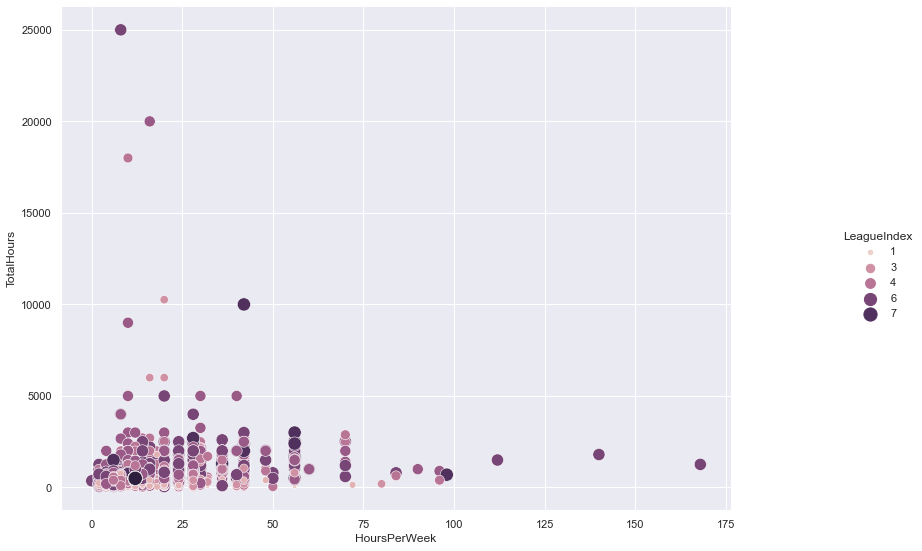

In [31]:

sns.relplot(x="HoursPerWeek",
            y="TotalHours",
            hue="LeagueIndex",
            #style="LeagueIndex",
            size="LeagueIndex",
            sizes=(20,200),
            data=df).fig.set_size_inches(14,8)

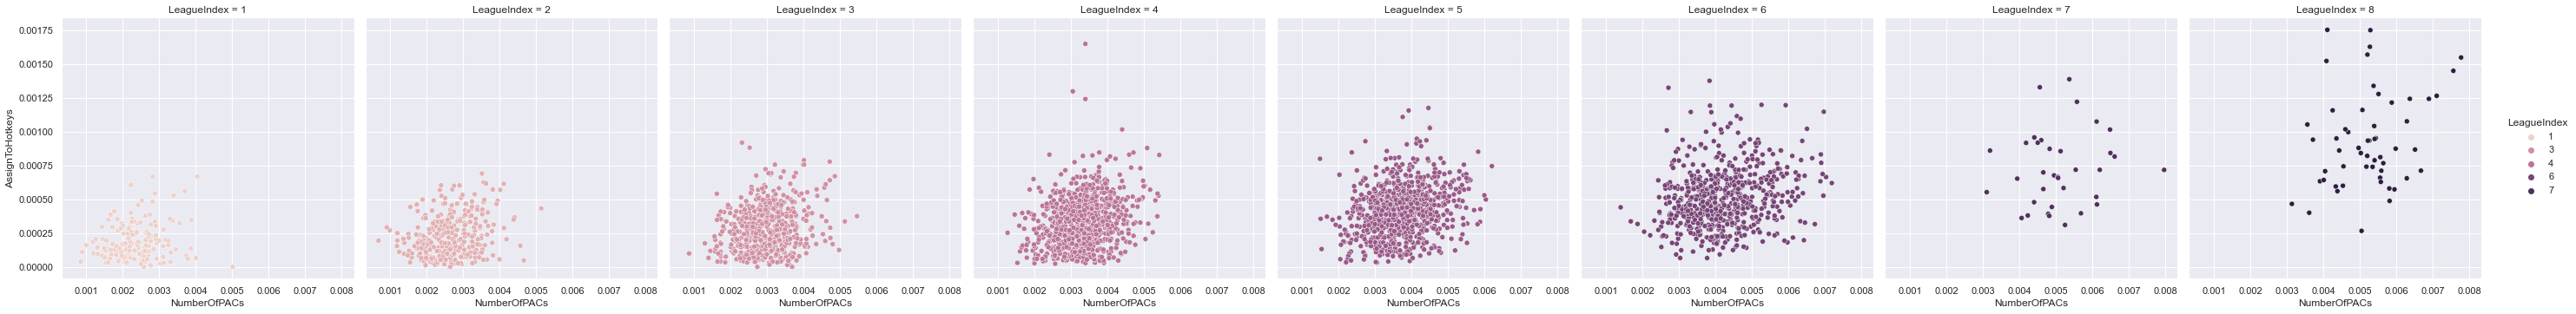

In [32]:
sns.relplot(
    data=df, x="NumberOfPACs", 
    y="AssignToHotkeys", 
    col="LeagueIndex",
    hue="LeagueIndex", 
    sizes=(10, 100)
)
#if you want to zoom, just double click on the plot

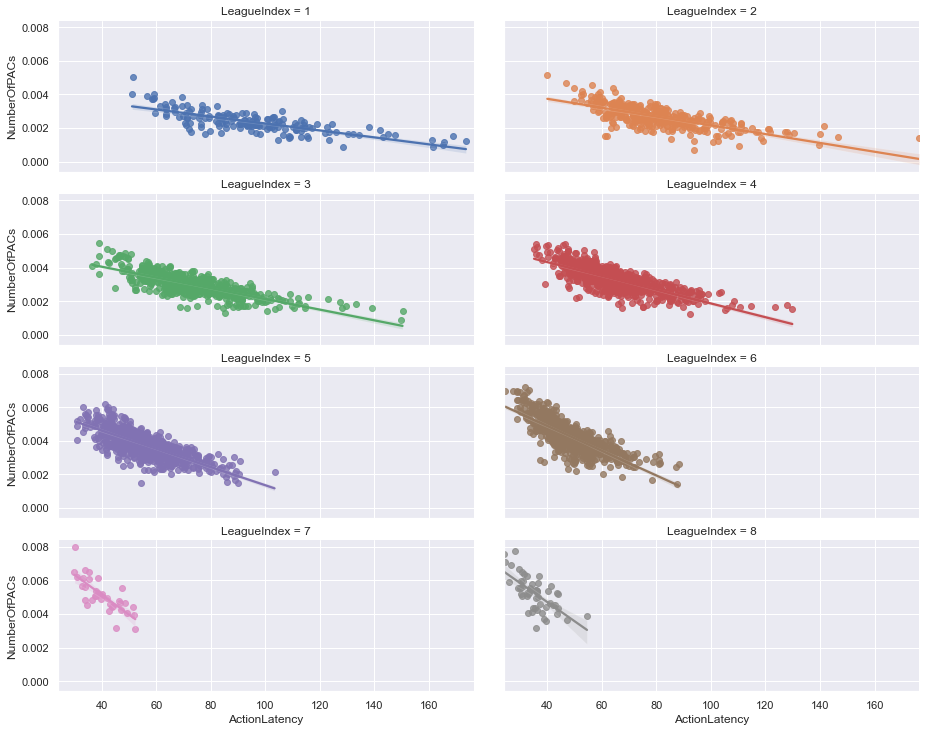

In [33]:
sns.lmplot(x="ActionLatency", 
           y="NumberOfPACs", 
           col="LeagueIndex",
           hue="LeagueIndex",
               data=df, 
           col_wrap=2, 
           height=3).fig.set_size_inches(14,10)

C:\Users\dewat\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dewat\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dewat\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dewat\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dewat\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.1% of the points

<AxesSubplot:xlabel='LeagueIndex', ylabel='GapBetweenPACs'>

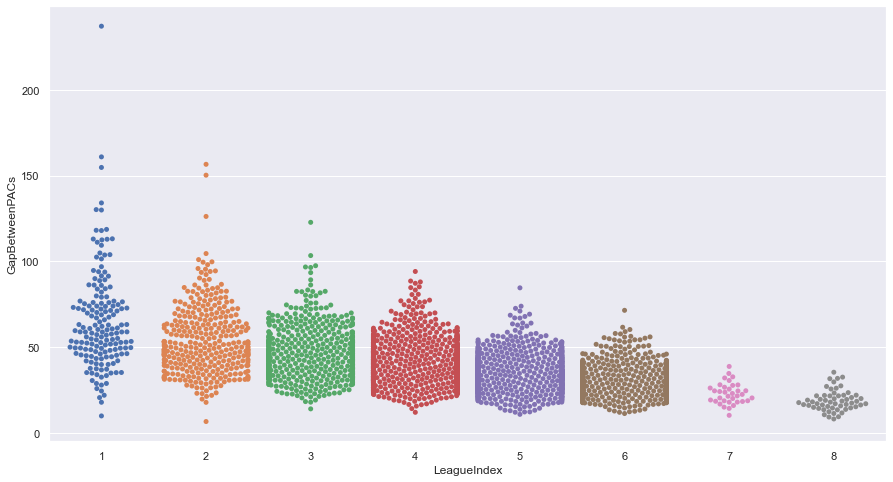

In [34]:
plt.figure(figsize=(15,8))
sns.swarmplot(x='LeagueIndex',y='GapBetweenPACs',data=df)

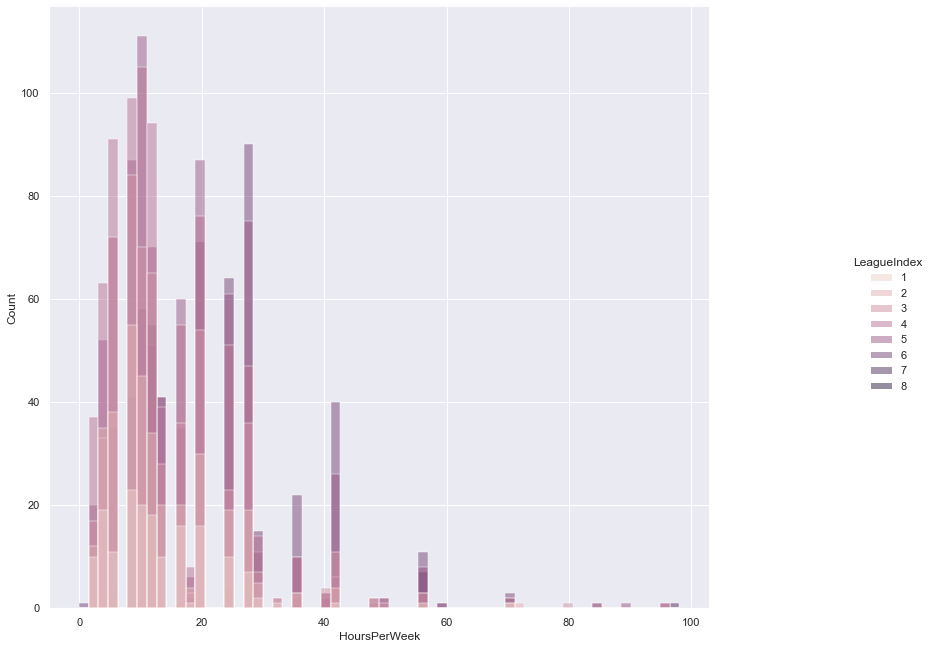

In [35]:
sns.displot(x='HoursPerWeek',
           hue='LeagueIndex',
           data=df[df["HoursPerWeek"]<100]).fig.set_size_inches(14,10)

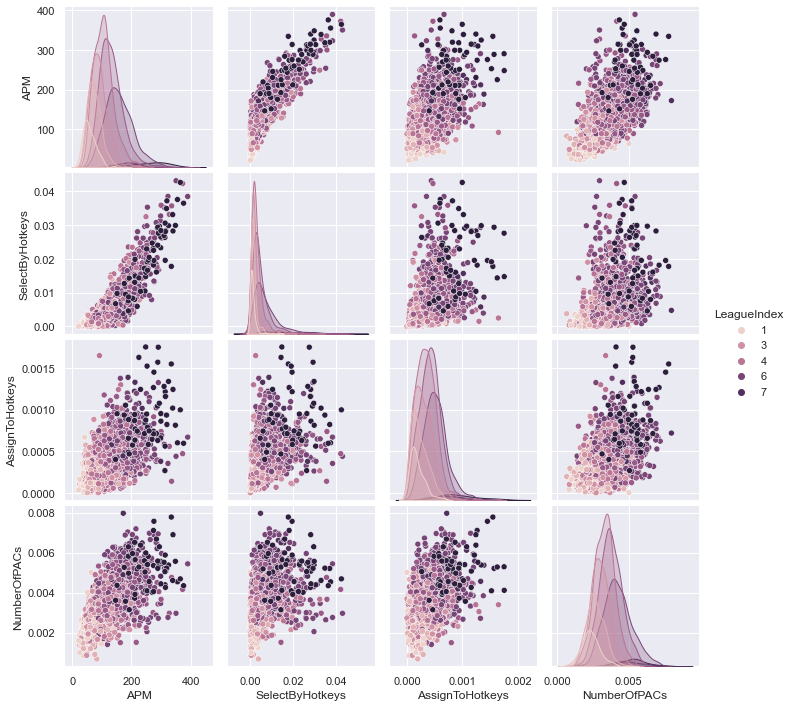

In [36]:
sns.pairplot(
    df,
    x_vars=["APM", "SelectByHotkeys", "AssignToHotkeys","NumberOfPACs"],
    y_vars=["APM", "SelectByHotkeys", "AssignToHotkeys","NumberOfPACs"],
    hue='LeagueIndex'
)

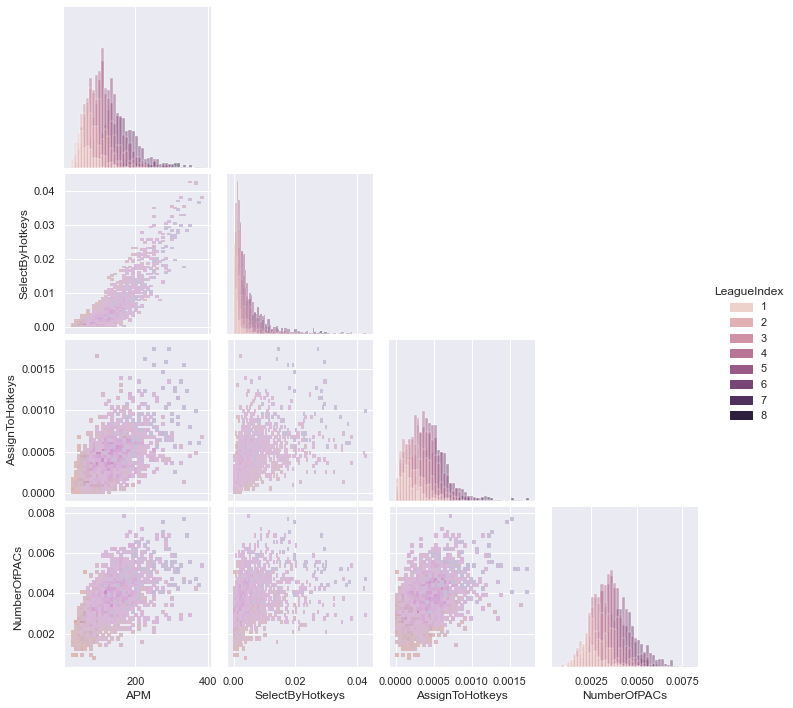

In [88]:
sns.pairplot(
    df,
    x_vars=["APM", "SelectByHotkeys", "AssignToHotkeys","NumberOfPACs"],
    y_vars=["APM", "SelectByHotkeys", "AssignToHotkeys","NumberOfPACs"],
    hue='LeagueIndex',
    corner=True,
    kind="hist",
    #diag_kind="hist"
)

In [37]:
allMeans=df.groupby(by="LeagueIndex").mean()
allMeans

,GameID,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
LeagueIndex,,,,,,,,,,,,,,,,,,,
1,4427.359281,22.724551,13.125749,264.191617,59.539277,0.001081,0.000185,3.215569,0.000028,0.000208,0.002363,65.654987,95.404977,4.548287,18.730539,0.000626,5.826347,0.000015,0.000042
2,4668.334294,22.155620,13.296830,331.409222,74.780917,0.001536,0.000222,3.351585,0.000045,0.000276,0.002650,53.788886,81.270053,5.005949,19.824207,0.000801,6.074928,0.000024,0.000076
3,4725.052441,22.050633,13.949367,493.792043,89.971260,0.002188,0.000282,3.687161,0.000056,0.000332,0.002976,46.143882,73.697301,5.163282,20.506329,0.000919,6.368897,0.000045,0.000117
4,4715.130703,21.981504,14.022195,588.006165,105.847166,0.003150,0.000340,3.971640,0.000075,0.000368,0.003310,41.041426,64.793765,5.236971,22.019729,0.001006,6.573366,0.000065,0.000138
5,4704.237267,21.366460,16.168944,780.985093,131.334502,0.004957,0.000414,4.699379,0.000115,0.000426,0.003742,34.734685,56.109800,5.467554,23.068323,0.001168,6.700621,0.000076,0.000176
6,4843.792271,20.677939,21.088567,988.405797,158.683211,0.007437,0.000512,5.521739,0.000156,0.000473,0.004231,30.207895,48.947837,5.475560,24.307568,0.001211,6.869565,0.000077,0.000182
7,4683.771429,21.171429,31.714286,1581.028571,189.555686,0.009418,0.000723,6.771429,0.000340,0.000570,0.005111,22.978160,40.342903,5.226089,28.028571,0.001238,7.028571,0.000082,0.000267
8,10051.509091,21.000000,12.000000,500.000000,267.341236,0.020981,0.000937,7.345455,0.000376,0.000831,0.005237,18.969773,35.390153,5.676727,22.854545,0.001077,6.127273,0.000026,0.000135


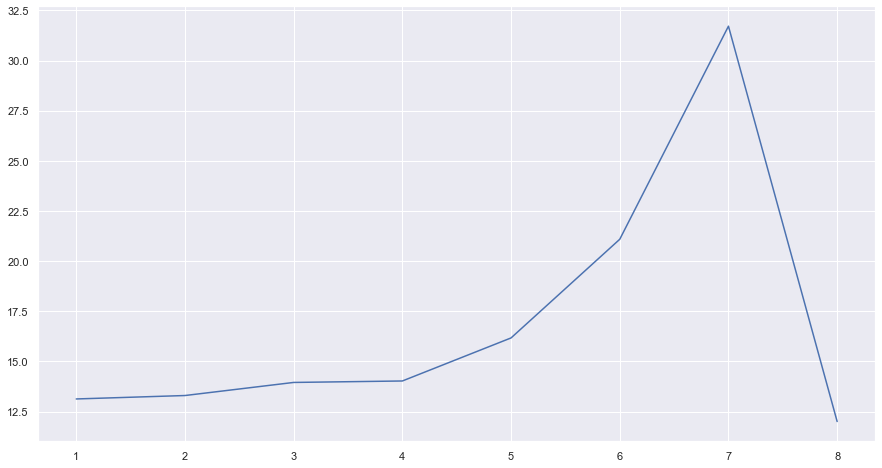

In [31]:
plt.figure(figsize=(15,8))
plt.plot(allMeans.index,allMeans["HoursPerWeek"])

<Figure size 1080x576 with 0 Axes>

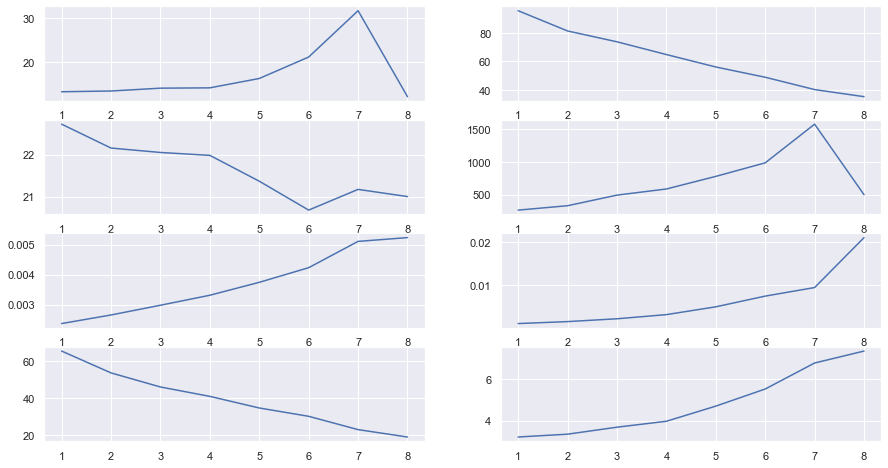

In [38]:
plt.figure(figsize=(15,8))
fig, ax = plt.subplots(4, 2,figsize=(15,8))
ax[0, 0].plot(allMeans.index,allMeans["HoursPerWeek"]) #row=0, col=0
ax[1, 0].plot(allMeans.index,allMeans["Age"]) #row=1, col=0
ax[0, 1].plot(allMeans.index,allMeans["ActionLatency"]) #row=0, col=1
ax[1, 1].plot(allMeans.index,allMeans["TotalHours"]) #row=1, col=1
ax[2, 0].plot(allMeans.index,allMeans["NumberOfPACs"]) 
ax[3, 0].plot(allMeans.index,allMeans["GapBetweenPACs"])
ax[2, 1].plot(allMeans.index,allMeans["SelectByHotkeys"]) 
ax[3, 1].plot(allMeans.index,allMeans["UniqueHotkeys"])
plt.show()

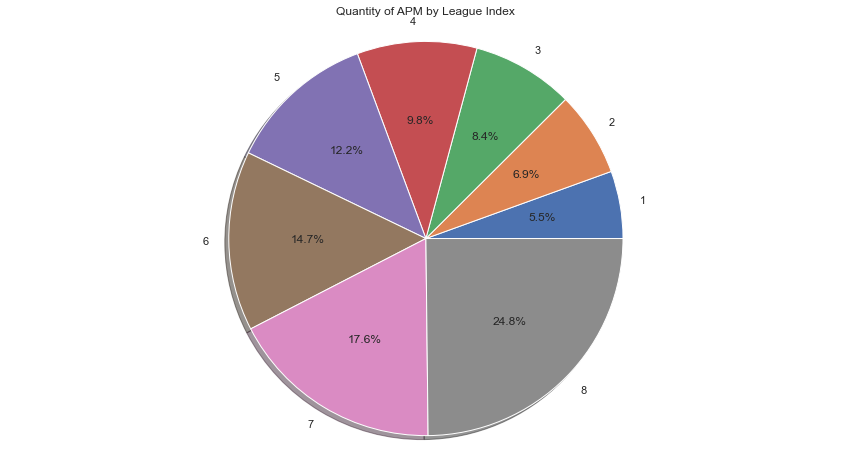

In [39]:
plt.figure(figsize=(15,8))
plt.pie(allMeans['APM'],labels=allMeans.index,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('Quantity of APM by League Index')
plt.show()

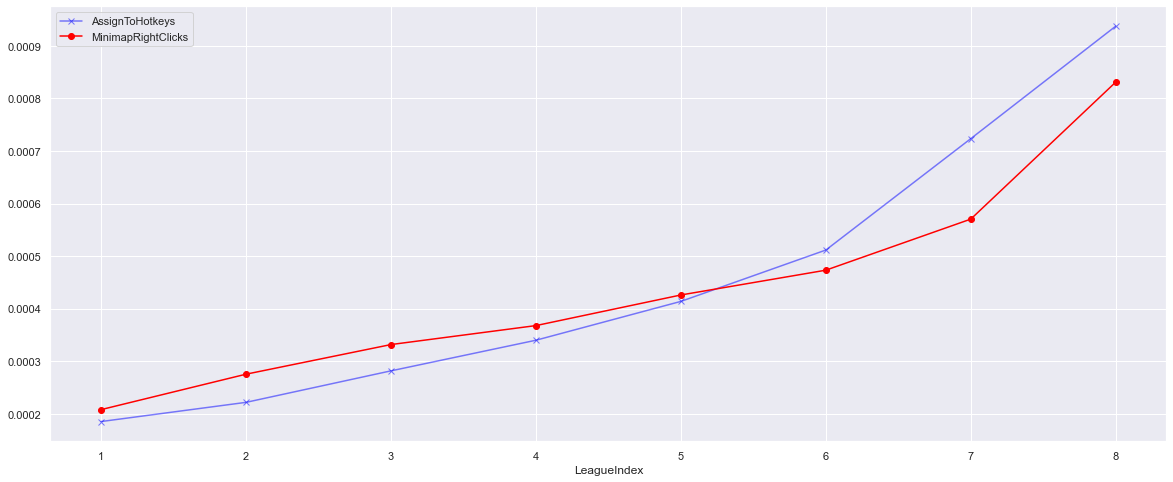

In [40]:
fig,ax=plt.subplots(figsize=(20,8))
ax.plot(allMeans.index,allMeans['AssignToHotkeys'],color="blue",alpha=0.5,marker='x',label='AssignToHotkeys')#half transparent
ax.legend()
ax.plot(allMeans.index,allMeans['MinimapRightClicks'],color="red",marker='o',label='MinimapRightClicks')
ax.legend()
plt.xlabel("LeagueIndex")
plt.show()

In [41]:
df["LeagueIndex"]=df["LeagueIndex"].replace([1,2,7,8],[2,2,6,6])

<AxesSubplot:xlabel='LeagueIndex', ylabel='count'>

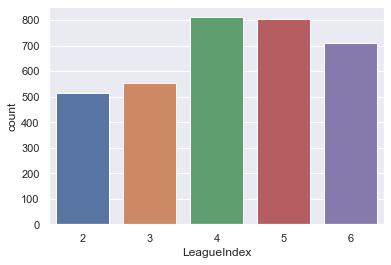

In [42]:
sns.countplot(x='LeagueIndex',data=df)

<AxesSubplot:>

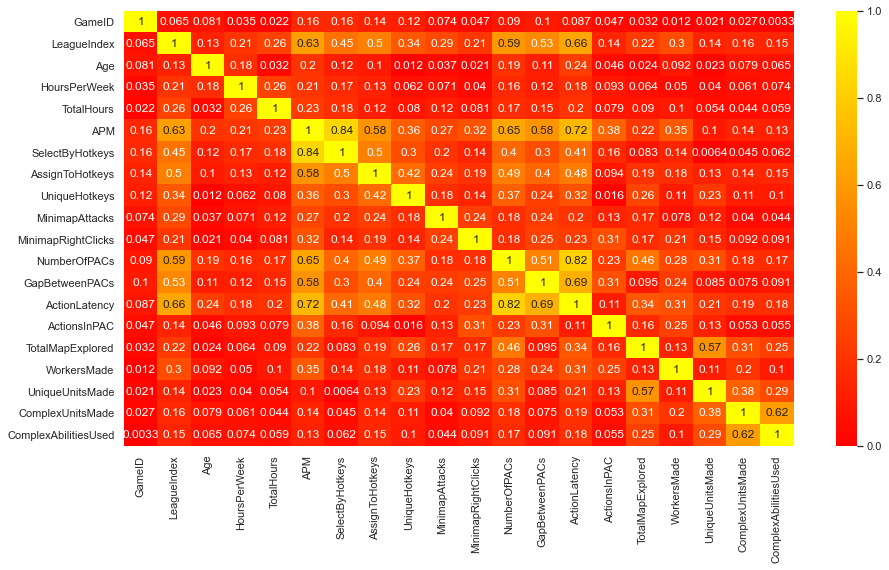

In [43]:

cor=df.corr().abs()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cor,
            cmap='autumn',
            annot=True,
            vmax=1,
            vmin=0,
            linewidths=0,
            #cbar_kws ={"orientation":"horizontal"}
           )
                 

We just keep variables with a correlation of 0.4 or more with LeagueIndex 

In [44]:
df=df.drop([
            "GameID",
            "Age",
            "HoursPerWeek",
            "TotalHours",
            "UniqueHotkeys",
            "MinimapAttacks",
           "MinimapRightClicks",
            "ActionsInPAC",
            "TotalMapExplored",
            "WorkersMade",
            "UniqueUnitsMade",
           "ComplexUnitsMade",
            "ComplexAbilitiesUsed",
            #"SelectByHotkeys",
            #"AssignToHotkeys"
           ],axis=1)
df.head()

,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,NumberOfPACs,GapBetweenPACs,ActionLatency
0,5,143.7180,0.003515,0.000220,0.004849,32.6677,40.8673
1,5,129.2322,0.003304,0.000259,0.004307,32.9194,42.3454
2,4,69.9612,0.001101,0.000336,0.002926,44.6475,75.3548
3,3,107.6016,0.001034,0.000213,0.003783,29.2203,53.7352
4,3,122.8908,0.001136,0.000327,0.002368,22.6885,62.0813


<AxesSubplot:>

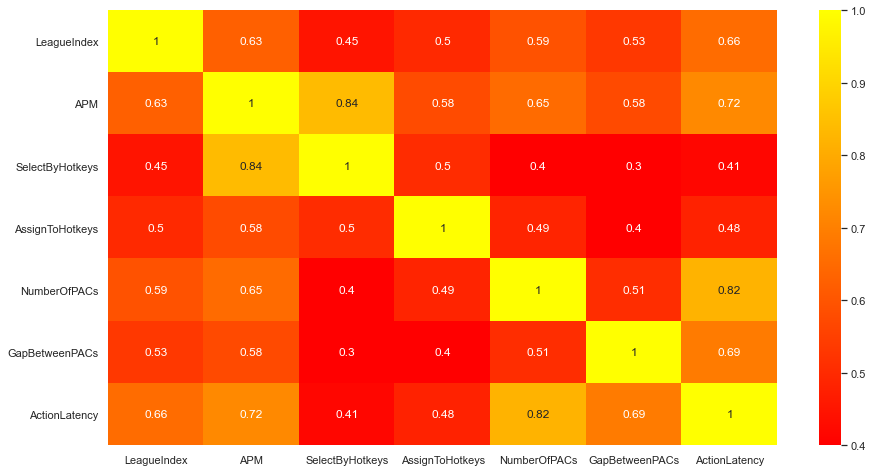

In [45]:
cor=df.corr().abs()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cor,
            cmap='autumn',
            annot=True,
            vmax=1,
            vmin=0.4,
            linewidths=0,
            #cbar_kws ={"orientation":"horizontal"}
           )

# Our models

In [122]:
print("Before OverSampling, counts of label '2': {}".format(sum(y_train==2)))
print("Before OverSampling, counts of label '8': {} \n".format(sum(y_train==8)))
print("Before OverSampling, counts of label '5': {}".format(sum(y_train==5)))
print("Before OverSampling, counts of label '6': {} \n".format(sum(y_train==6)))

Before OverSampling, counts of label '2': 336
Before OverSampling, counts of label '8': 0 

Before OverSampling, counts of label '5': 553
Before OverSampling, counts of label '6': 518 



In [33]:
#pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [123]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [125]:
print("After OverSampling, counts of label '2': {}".format(sum(y_train==2)))
print("After OverSampling, counts of label '8': {} ".format(sum(y_train==8)))
print("After OverSampling, counts of label '5': {}".format(sum(y_train==5)))
print("After OverSampling, counts of label '6': {} ".format(sum(y_train==6)))

After OverSampling, counts of label '2': 562
After OverSampling, counts of label '8': 0 
After OverSampling, counts of label '5': 562
After OverSampling, counts of label '6': 562 


In [46]:
X=df.iloc[:,1:].values
y=df.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3)

In [47]:


#X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3)
scaler= StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scaler2=MinMaxScaler()
scaler2.fit(X_train)
X_train2 = scaler2.fit_transform(X_train)
X_test2 = scaler2.transform(X_test)

scaler3=RobustScaler()
scaler3.fit(X_train)
X_train3 = scaler3.fit_transform(X_train)
X_test3 = scaler3.transform(X_test)

scaler4=MaxAbsScaler()
scaler4.fit(X_train)
X_train4 = scaler4.fit_transform(X_train)
X_test4 = scaler4.transform(X_test)

scaler5=Normalizer()
scaler5.fit(X_train)
X_train5 = scaler5.fit_transform(X_train)
X_test5 = scaler5.transform(X_test)

In [38]:
def bestPara(params,model,X,Y):
    grid=GridSearchCV(model,params,n_jobs=-1,cv=5,verbose=1)
    grid.fit(X,Y)
    print('Score : ',grid.best_score_*100,'%')
    print('Best estimator : ',grid.best_estimator_)
    return grid

def resultsClassification(model,X_train,Y_train,X_test,Y_test):
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    log = accuracy_score(Y_test,y_pred)*100
    print("Accuracy Score:",accuracy_score(Y_test,y_pred)*100,"%")
    print(pd.crosstab(y_pred,Y_test))
    print(classification_report(Y_test,y_pred))
    
acc_dict={}

In [68]:
parameters = {
                'priors':[None],
                'var_smoothing':[1e-09]
}
grid=bestPara(parameters,GaussianNB(),X_train,y_train)
acc_dict["GaussianNB"]=grid.best_score_*100

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Score :  34.02105263157894 %
Best estimator :  GaussianNB()


In [69]:
parameters={
            #'splitter':["best","random"],
            'max_depth':[4,5,6,7,8,9,10],
            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
            "min_weight_fraction_leaf":[0.1,0.2],
            "max_features":["auto","log2","sqrt",None],
            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] 
           }
grid=bestPara(parameters,DecisionTreeClassifier(),X_train,y_train)
acc_dict["DecisionTreeClassifier"]=grid.best_score_*100

Fitting 5 folds for each of 5600 candidates, totalling 28000 fits
Score :  36.88421052631579 %
Best estimator :  DecisionTreeClassifier(max_depth=4, max_features='log2', max_leaf_nodes=50,
                       min_samples_leaf=6, min_weight_fraction_leaf=0.1)


In [70]:
parameters = {
           'reg_param': [0.65,0.735,0.74],
            'store_covariance':[True,False]
}
grid=bestPara(parameters,QuadraticDiscriminantAnalysis(),X_train,y_train)
acc_dict["QuadraticDiscriminantAnalysis"]=grid.best_score_*100

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Score :  38.48421052631579 %
Best estimator :  QuadraticDiscriminantAnalysis(reg_param=0.74, store_covariance=True)


C:\Users\dewat\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [87]:
parameters = {
                'solver': ['svd', 'lsqr', 'eigen'],
                'shrinkage':['auto',None]
            }
grid=bestPara(parameters,LinearDiscriminantAnalysis(),X_train,y_train)
acc_dict["LinearDiscriminantAnalysis"]=grid.best_score_*100

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Score :  42.357894736842105 %
Best estimator :  LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')


C:\Users\dewat\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.42357895 0.42357895 0.42315789 0.42357895 0.42357895]
  warnings.warn(


In [72]:
clf=LogisticRegression()
ada = AdaBoostClassifier(clf)
parameters = {'base_estimator__C' :[0.6],
              'n_estimators' :[ 20],
              #'learning_rate' :[0.0001, 0.001, 0.01, 0.1, 1]
             }
grid=bestPara(parameters,ada,X_train,y_train)
acc_dict["AdaBoost"]=grid.best_score_*100

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Score :  39.07368421052632 %
Best estimator :  AdaBoostClassifier(base_estimator=LogisticRegression(C=0.6), n_estimators=20)


In [73]:
parameters={
            'weights':['uniform','distance'],
            'metric' : ['manhattan','euclidean','minkowski'],
            'leaf_size': [1], 
            'n_neighbors': list(range(1,20)), 
            'p': [1, 2]
           }
grid=bestPara(parameters,KNeighborsClassifier(),X_train3,y_train)
acc_dict["KNeighborsClassifier"]=grid.best_score_*100

Fitting 5 folds for each of 228 candidates, totalling 1140 fits
Score :  42.77894736842106 %
Best estimator :  KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=18, p=1,
                     weights='distance')


In [74]:
parameters = {
                'C': [0.1,1, 10, 100], 
                'gamma': [1,0.1,0.01,0.001],
                'kernel': ['rbf', 'poly', 'sigmoid'],
                'gamma':['scale','auto']
            }
grid=bestPara(parameters,SVC(),X_train,y_train)
acc_dict["SVC"]=grid.best_score_*100

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Score :  40.08421052631579 %
Best estimator :  SVC(C=1, gamma='auto')


In [64]:
parameters={
            'n_estimators': [10,15,20, 25], 
            'max_features': [3,4,5,6], 
            'max_depth': [60,65, None], 
            #'bootstrap': [True, False],
            #'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [4, 5, 6]
           }
grid=bestPara(parameters,RandomForestClassifier(),X_train,y_train)
acc_dict["RandomForestClassifier"]=grid.best_score_*100

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Score :  47.53684210526316 %
Best estimator :  RandomForestClassifier(max_depth=60, max_features=5, min_samples_split=6,
                       n_estimators=20)


In [133]:

parameters={
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'penalty' : ['l2','l1', 'elasticnet', 'none'],
            'C' : [100, 10, 1.0,8],
            'class_weight':[None,'balanced'],
            #'fit_intercept':[True,False],
            #'multi_class':['auto', 'ovr', 'multinomial']
           }
grid=bestPara(parameters,LogisticRegression(),X_train2,y_train)
acc_dict["LogisticRegression"]=grid.best_score_*100

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Score :  46.04982206405694 %
Best estimator :  LogisticRegression(class_weight='balanced', penalty='l1', solver='saga')


C:\Users\dewat\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.45551601 0.4569395  0.4480427  0.45516014 0.45551601        nan
        nan 0.44875445        nan 0.45551601        nan        nan
        nan        nan        nan 0.45516014 0.45622776        nan
 0.45551601 0.45516014 0.45516014 0.4544484  0.4480427  0.45516014
 0.45516014        nan        nan 0.4480427         nan 0.45622776
        nan        nan        nan        nan        nan 0.45587189
 0.45587189        nan 0.45587189 0.45587189 0.4544484  0.45373665
 0.44519573 0.45409253 0.4544484         nan        nan 0.44911032
        nan 0.45551601        nan        nan        nan        nan
        nan 0.45516014 0.45622776        nan 0.45551601 0.45516014
 0.4544484  0.45373665 0.4455516  0.4544484  0.4544484         nan
        nan 0.44839858        nan 0.45516014        nan        nan
        nan        nan        nan 0.45587189 0.455871

In [86]:
#GradientBoostingClassifier(n_estimators=100,random_state=SEED,verbose=1)
parameters={
            #'loss':['deviance','exponential'],
            #'criterion':['friedman_mse', 'squared_error', 'mse', 'mae'],
            'max_depth':[1,3,5],
            #'max_features':['auto', 'sqrt', 'log2'],
            'min_samples_leaf':[1,2,3]
}

grid=bestPara(parameters,GradientBoostingClassifier(),X_train,y_train)
acc_dict["GradientBoostingClassifier"]=grid.best_score_*100

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Score :  40.21052631578947 %
Best estimator :  GradientBoostingClassifier(max_depth=5, min_samples_leaf=3)


<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

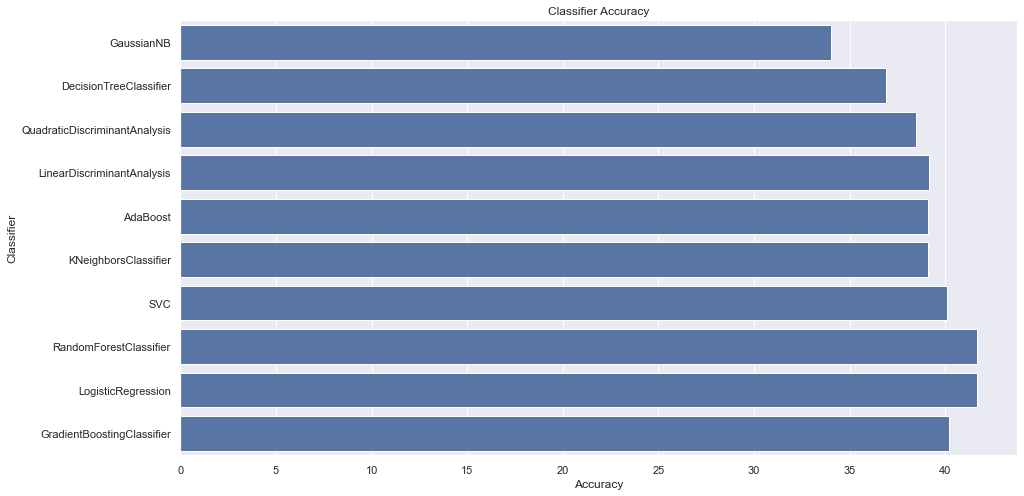

In [87]:
result_models=pd.DataFrame(list(acc_dict.items()),columns=['Classifier', 'Accuracy'])
plt.title('Classifier Accuracy')
sns.barplot(x='Accuracy', y='Classifier', data=result_models, color="b")

In [134]:
resultsClassification(LogisticRegression(class_weight='balanced', penalty='l1', solver='saga')
                      ,X_train2,y_train,X_test2,y_test)

Accuracy Score: 43.47399411187439 %
col_0    2   3   4   5    6
row_0                      
2      118  48  43  12    0
3       36  44  52  22    5
4       15  33  73  48   15
5        6  20  60  80   45
6        3   2  21  90  128
              precision    recall  f1-score   support

           2       0.53      0.66      0.59       178
           3       0.28      0.30      0.29       147
           4       0.40      0.29      0.34       249
           5       0.38      0.32      0.35       252
           6       0.52      0.66      0.59       193

    accuracy                           0.43      1019
   macro avg       0.42      0.45      0.43      1019
weighted avg       0.42      0.43      0.42      1019

